# Assignment: Autoencoders


#1. Learning objectives
   -  Experiment with autoencoders for different purposes.
   - Practice implementing neural network architectures
   - Practice evaluating neural networks, specifically autoencoders

You are expected to hand-in a Jupyter notebook based on this one. Your notebook should contain running code and answer all questions posed in this assignment.

You can structure your code as you wish, as long as it is well structured and commented. You can structure it in different files or in a single one. The code provided in this assignment is a suggestion, feel free to solve the exercises as you wish



#2. Autoencoders for noise reduction
## Data preparation



In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

2024-11-21 17:54:32.822860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 17:54:32.827433: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 17:54:32.839965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732208072.858748   13019 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732208072.864115   13019 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 17:54:32.880248: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Load the MNIST dataset and normalize it to values between 0 and 1.

Add Gaussian Noise to simulate a noisy dataset. Experiment with noise levels and observe the images generated.

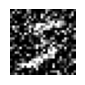

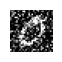

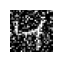

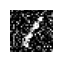

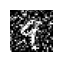

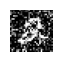

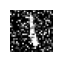

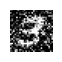

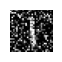

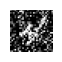

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]

# Add Gaussian noise
#noise_factor = 0.2
noise_factor = 0.5
#noise_factor = 0.8

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be in the [0,1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Display a few noisy images
plt.figure(figsize=(10, 2))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(x_train_noisy[i], cmap="gray")
  plt.axis("off")
  plt.show()

**What do you observe with different amounts of noise?**

We experiment with 3 levels of noise:

Low noise (noise_factor=0.2): in this case the images retain most of their original structure, and digits are still easily recognizable. We can observe a little distortions.

Moderate noise (noise_factor=0.5): the initial experiment, the digits become partially obscured, but their structure is still discernible. Classification tasks may become more challenging but possible.

High noise (noise_factor=0.8): in this case the images are heavily corrupted with noise, making the digits difficult or impossible to identify. Classification accuracy would likely drop significantly due to the lack of distinguishable features.

## Building an autoencoder
   - **Define the Encoder**: Create a simple feedforward encoder using `Dense` layers to compress the input image into a low-dimensional representation.
   - **Define the Decoder**: Construct the decoder, which maps the low-dimensional encoding back to the original image dimensions.
   - **Combine Encoder and Decoder** to form the complete autoencoder model.

In [3]:
# Define input shape
input_img = Input(shape=(28, 28))

# Encoder
x = Flatten()(input_img) #We define the model by applying each layer to the previous one. This is a different method than using the "layers" function as we did in other labs.
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(784, activation='sigmoid')(x)  # Sigmoid for values between 0 and 1. The last layer has to have 28x28 neurons since we are reforming an image.
decoded = Reshape((28, 28))(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy') #binary cross entropy can be used instead of MSE when the last layer has a sigmoid activation, it helps prevent decaying gradients

2024-11-21 17:54:36.766061: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



   - Train the autoencoder using the noisy images as input and the original images as target output.

   - After training, use the autoencoder to denoise a few test images and compare them to the noisy inputs and original clean images.

In [4]:
history = autoencoder.fit(
       x_train_noisy, x_train,
       epochs=20,
       batch_size=256,
       shuffle=True,
       validation_data=(x_test_noisy, x_test) )

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3269 - val_loss: 0.1805
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1729 - val_loss: 0.1520
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1502 - val_loss: 0.1407
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1400 - val_loss: 0.1348
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1346 - val_loss: 0.1310
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1308 - val_loss: 0.1278
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1275 - val_loss: 0.1260
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1252 - val_loss: 0.1233
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1229 - val_loss: 0.1219
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1215 - val_loss: 0.1206
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1202 - val_loss: 0.1190
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

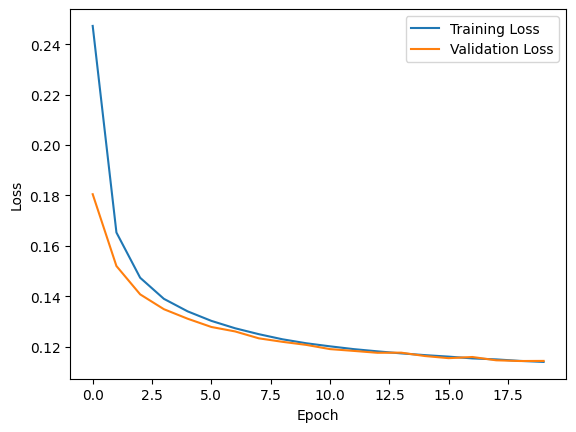

In [5]:
#Plot loss function over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


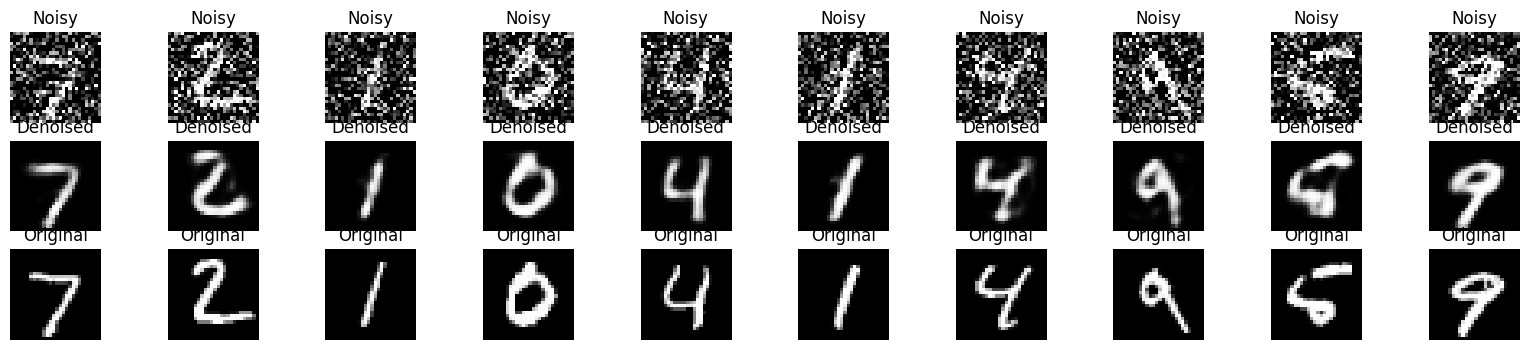

In [6]:
# Denoise test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display noisy image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test_noisy[i], cmap="gray")
  plt.title("Noisy")
  plt.axis("off")

  # Display denoised image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(decoded_imgs[i], cmap="gray")
  plt.title("Denoised")
  plt.axis("off")

  # Display original image
  ax = plt.subplot(3, n, i + 2 * n + 1)
  plt.imshow(x_test[i], cmap="gray")
  plt.title("Original")
  plt.axis("off")
plt.show()


**Questions for Analysis**:
  1. Experiment with the architecture: explore different numbers of layers and their effect on model performance. Try adjusting the bottleneck layer to make it bigger or smaller.

  We experiment adding more layers and also increasing the number of neurons in each layer. This improve the model's capacity to learn complex mappings. However, it risks overfitting if not paired with regularization.
  With adjusting the bottleneck layer we observe that a smaller bottleneck forces the model to compress the input more, potentially losing fine details but encouraging it to learn general features. And when we change to a larger bottleneck, it retains more details but may reconstruct noise if too large.

  2. How does the noise level (i.e., `noise_factor`) affect the model's ability to denoise?

After the experiments done before we can say that if we increasing the noise factor (noise_factor ~ 0.8) makes it harder for the model to denoise, often producing blurry outputs or incomplete reconstructions. And if we put a lower noise factor (noise_factor ~ 0.2) generally results in better denoised images but doesn’t test the model's robustness against challenging scenarios.

  3. What do you observe about the quality of the reconstructed images at different noise levels?

  In case of recontructed images, if we put lower noise levels, denoised images closely resemble the originals, with sharp and clear outputs. But if we put a higher noise levels, reconstructions may become blurry or lose details, especially in complex regions, like happens with number 5 for example.

Show all your experiments in the final report (in your jupyter notebook).

Below we do an experiment with 3 layers to encoded (no count flatten layer) and every layer have less neurons of the previous one. And finish with 32 neurons and with a noise_factor of 0.8 and still works well de decoder. 

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]

# Add Gaussian noise
noise_factor = 0.8

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Define input shape
input_img = Input(shape=(28, 28))

# Encoder
x = Flatten()(input_img) #We define the model by applying each layer to the previous one. This is a different method than using the "layers" function as we did in other labs.
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)  # Sigmoid for values between 0 and 1. The last layer has to have 28x28 neurons since we are reforming an image.
decoded = Reshape((28, 28))(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy') #binary cross entropy can be used instead of MSE when the last layer has a sigmoid activation, it helps prevent decaying gradients

history = autoencoder.fit(
       x_train_noisy, x_train,
       epochs=20,
       batch_size=256,
       shuffle=True,
       validation_data=(x_test_noisy, x_test) )



Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3332 - val_loss: 0.1957
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1882 - val_loss: 0.1719
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1677 - val_loss: 0.1630
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1591 - val_loss: 0.1577
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1534 - val_loss: 0.1537
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1486 - val_loss: 0.1511
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1457 - val_loss: 0.1488
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1431 - val_loss: 0.1484
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1410 - val_loss: 0.1462
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1393 - val_loss: 0.1458
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1381 - val_loss: 0.1449
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


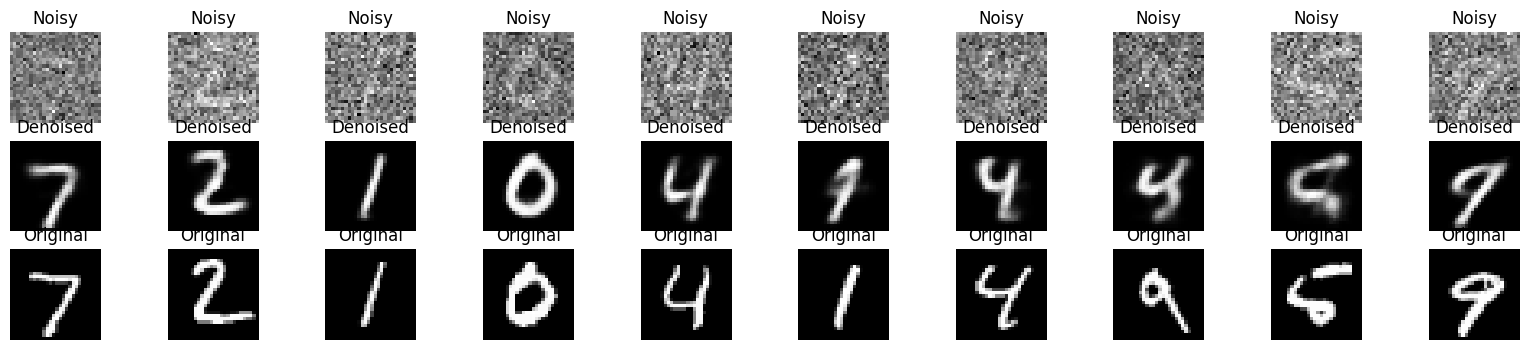

In [8]:
# Denoise test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display noisy image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test_noisy[i], cmap="gray")
  plt.title("Noisy")
  plt.axis("off")

  # Display denoised image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(decoded_imgs[i], cmap="gray")
  plt.title("Denoised")
  plt.axis("off")

  # Display original image
  ax = plt.subplot(3, n, i + 2 * n + 1)
  plt.imshow(x_test[i], cmap="gray")
  plt.title("Original")
  plt.axis("off")
plt.show()

Below we do an experiment with 4 layers to encoded (no count flatten layer) and every layer have less neurons of the previous one. And finish with 16 neurons and with a noise_factor of 0.8 and still works more less well, but its true that fails in some cases. 

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3415 - val_loss: 0.2180
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2062 - val_loss: 0.1813
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1769 - val_loss: 0.1711
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1671 - val_loss: 0.1649
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1614 - val_loss: 0.1619
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1574 - val_loss: 0.1594
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1542 - val_loss: 0.1572
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1514 - val_loss: 0.1560
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1494 - val_loss: 0.1547
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1472 - val_loss: 0.1540
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1454 - val_loss: 0.1527
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

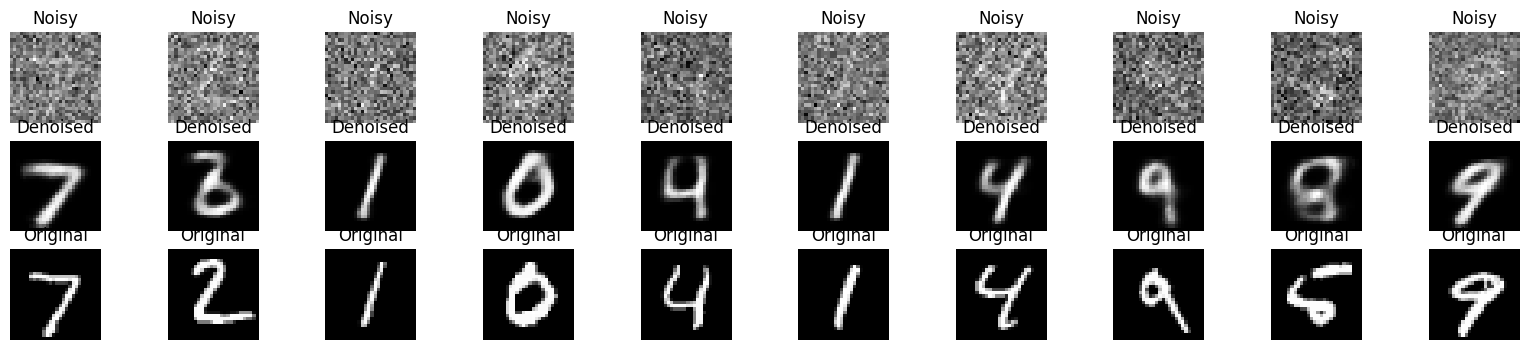

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]

# Add Gaussian noise
noise_factor = 0.8

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Define input shape
input_img = Input(shape=(28, 28))

# Encoder
x = Flatten()(input_img) #We define the model by applying each layer to the previous one. This is a different method than using the "layers" function as we did in other labs.
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
encoded = Dense(16, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)  # Sigmoid for values between 0 and 1. The last layer has to have 28x28 neurons since we are reforming an image.
decoded = Reshape((28, 28))(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy') #binary cross entropy can be used instead of MSE when the last layer has a sigmoid activation, it helps prevent decaying gradients

history = autoencoder.fit(
       x_train_noisy, x_train,
       epochs=20,
       batch_size=256,
       shuffle=True,
       validation_data=(x_test_noisy, x_test) )


# Denoise test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display noisy image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test_noisy[i], cmap="gray")
  plt.title("Noisy")
  plt.axis("off")

  # Display denoised image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(decoded_imgs[i], cmap="gray")
  plt.title("Denoised")
  plt.axis("off")

  # Display original image
  ax = plt.subplot(3, n, i + 2 * n + 1)
  plt.imshow(x_test[i], cmap="gray")
  plt.title("Original")
  plt.axis("off")
plt.show()

# 3. Autoencoders for anomaly detection

This par of the assignment is based on Tensorflow's [Introduction to Autoencoders](https://www.tensorflow.org/tutorials/generative/autoencoder) . All copyright goes to Tensorflow.

In this example, you will train an autoencoder to detect anomalies on the ECG5000 dataset. This dataset contains 5,000 Electrocardiograms, each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either 0 (corresponding to an abnormal rhythm), or 1 (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

Download the dataset and separate it into data and label vectors.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocardiogram data
data = raw_data[:, 0:-1]


Normalize the data and split into training and testing sets.

In [11]:
min_val = tf.reduce_min(data)
max_val = tf.reduce_max(data)
data = (data - min_val) / (max_val - min_val)


data = tf.cast(data, tf.float32)


train_data, test_data, train_labels, test_labels = train_test_split(
    data.numpy(), labels, test_size=0.2, random_state=21
)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. Separate the normal rhythms from the abnormal rhythms.

In [12]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Build an autoencoder to encode and decode the normal ECGs. You will use the same dataset as input and as target.

In [13]:
# Define input shape
input_ecg = Input(shape=(140,))

# Encoder
x = Dense(32, activation="relu")(input_ecg)
x = Dense(16, activation="relu")(x)
encoded=Dense(8, activation="relu")(x)


# Decoder
x = Dense(16, activation="relu")(encoded)
x = Dense(32, activation="relu")(x)
decoded =Dense(140, activation="sigmoid")(x)

# Autoencoder model
autoencoder = Model(input_ecg, decoded)
autoencoder.compile(optimizer=Adam(), loss='mae')

history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True) #Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0481 - val_loss: 0.0441
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - val_loss: 0.0433
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - val_loss: 0.0424
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - val_loss: 0.0415
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - val_loss: 0.0407
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0383 - val_loss: 0.0397
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0360 - val_loss: 0.0387
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - val_loss: 0.0380
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - val_loss: 0.0372
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0302 - val_loss: 0.0364
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - val_loss: 0.0358
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - val_loss: 0.0351
Epoch 13/20


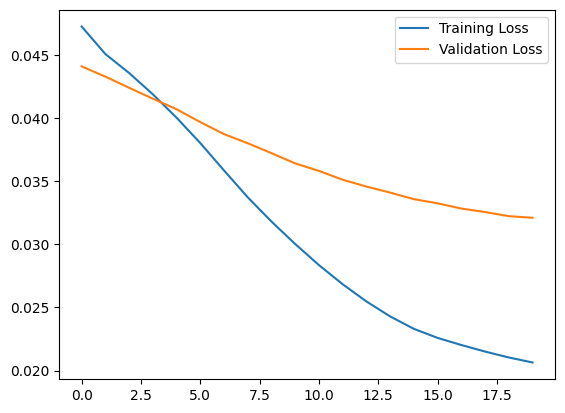

In [14]:
#plot loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error. Do the same for an abnormal ECG.

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


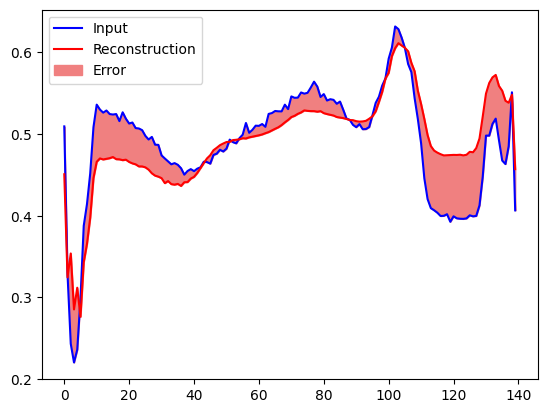

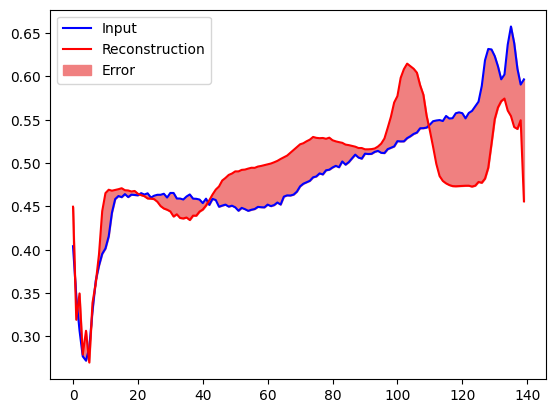

In [15]:
normal_decoded_data = autoencoder.predict(normal_test_data)
anomalous_decoded_data = autoencoder.predict(anomalous_test_data)

plt.plot(normal_test_data[0], 'b')
plt.plot(normal_decoded_data[0], 'r')
plt.fill_between(np.arange(140), normal_decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(anomalous_decoded_data[0], 'r')
plt.fill_between(np.arange(140), anomalous_decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. You will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

In [16]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
#Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold:  0.03191398


Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [17]:
def predict(model, data, threshold):
  reconstructions = autoencoder.predict(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold) #return 0 or 1 depending on whther more or less than threshold

preds = predict(autoencoder, test_data, threshold)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#check the prediction accuracy of the ecg classifier

print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
Accuracy = 0.944
Precision = 0.9071428571428571
Recall = 0.9921875


**Questions for Analysis**:
  1. Experiment with the architecture: explore different numbers of layers and their effect on model performance. Conduct a principled analysis: keep track of your experiments with a table or a list.

| Experiment | Encoder Layers         | Decoder Layers         | Performance Metrics (Accuracy / Precision / Recall) | Threshold                      |
|------------|------------------------|------------------------|-----------------------------------------------------|--------------------------------|
| Initial    | 32 → 16 → 8            | 16 → 32 → 140          | **0.944 / 0.907 / 0.992**                           | **0.0319**                     |
| 1          | 64 → 32 → 8            | 16 → 32 → 140          | **0.939 / 0.896 / 0.994**                           | **0.0291**                     |
| 2          | 16 → 8                 | 8 → 140                | **0.945 / 0.907 / 0.994**                           | **0.0342**                     |
 
  2. What do you observe about the quality of the final classifier depending on the performance of the autoencoder?

  We can say that the performance of the final classifier strongly depends on the autoencoder ability to reconstruct normal rhythms accurately. If the autoencoder struggles to minimize reconstruction error for normal data, the classifier will misclassify normal rhythms as anomalies, thats imply lowering precision.

  3. Explain, in your own words, why you think the final classifier works.

  Because the autoencoder is trained only for normal rhythms. For anomalous rhythms, the reconstruction deviates significantly, leading to higher reconstruction errors, which act as flags for anomalies. For thease reason we think the final classifier works.

Show all your experiments in the final report (in your jupyter notebook).

We experimented with different architectures as shown in the table above. The following code corresponds to Experiment 1:

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0467 - val_loss: 0.0435
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - val_loss: 0.0422
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - val_loss: 0.0410
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - val_loss: 0.0396
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0361 - val_loss: 0.0387
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - val_loss: 0.0378
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - val_loss: 0.0370
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - val_loss: 0.0362
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - val_loss: 0.0356
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - val_loss: 0.0349
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - val_loss: 0.0343
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - val_loss: 0.0334
Epoch 13/20


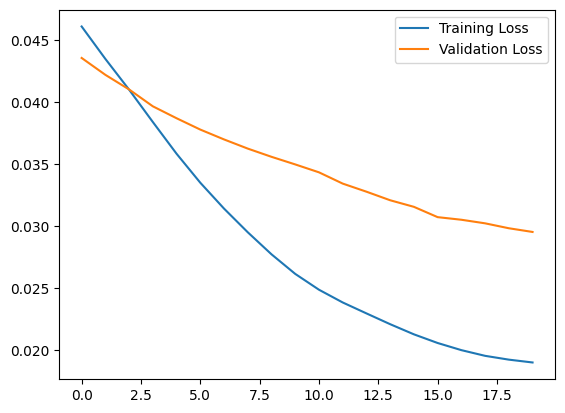

In [18]:
# Define input shape
input_ecg = Input(shape=(140,))

# Encoder
x = Dense(64, activation="relu")(input_ecg)
x = Dense(32, activation="relu")(x)
encoded=Dense(8, activation="relu")(x)


# Decoder
x = Dense(16, activation="relu")(encoded)
x = Dense(32, activation="relu")(x)
decoded =Dense(140, activation="sigmoid")(x)

# Autoencoder model
autoencoder = Model(input_ecg, decoded)
autoencoder.compile(optimizer=Adam(), loss='mae')

history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True) #Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

#plot loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


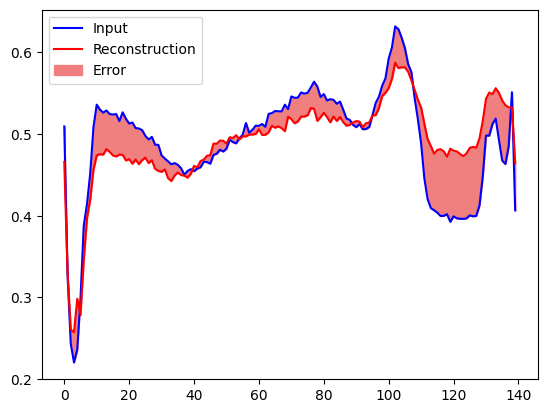

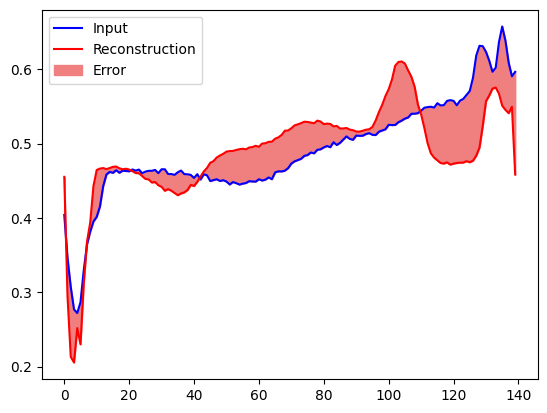

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
Threshold:  0.029158711
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
Accuracy = 0.939
Precision = 0.8964285714285715
Recall = 0.994059405940594


In [19]:
normal_decoded_data = autoencoder.predict(normal_test_data)
anomalous_decoded_data = autoencoder.predict(anomalous_test_data)

plt.plot(normal_test_data[0], 'b')
plt.plot(normal_decoded_data[0], 'r')
plt.fill_between(np.arange(140), normal_decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(anomalous_decoded_data[0], 'r')
plt.fill_between(np.arange(140), anomalous_decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
#Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


preds = predict(autoencoder, test_data, threshold)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#check the prediction accuracy of the ecg classifier

print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))

The following code corresponds to Experiment 2:

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0489 - val_loss: 0.0443
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - val_loss: 0.0434
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - val_loss: 0.0427
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - val_loss: 0.0420
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - val_loss: 0.0413
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - val_loss: 0.0406
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - val_loss: 0.0399
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0378 - val_loss: 0.0391
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - val_loss: 0.0385
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - val_loss: 0.0379
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0375
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0370
Epoch 13/20


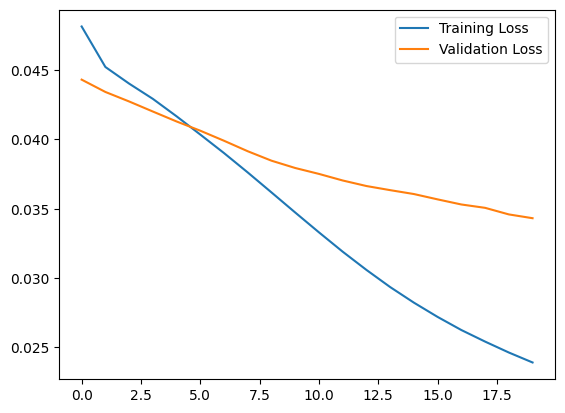

In [20]:
# Define input shape
input_ecg = Input(shape=(140,))

# Encoder
x = Dense(16, activation="relu")(input_ecg)
encoded=Dense(8, activation="relu")(x)


# Decoder
x = Dense(8, activation="relu")(encoded)
decoded =Dense(140, activation="sigmoid")(x)

# Autoencoder model
autoencoder = Model(input_ecg, decoded)
autoencoder.compile(optimizer=Adam(), loss='mae')

history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True) #Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

#plot loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


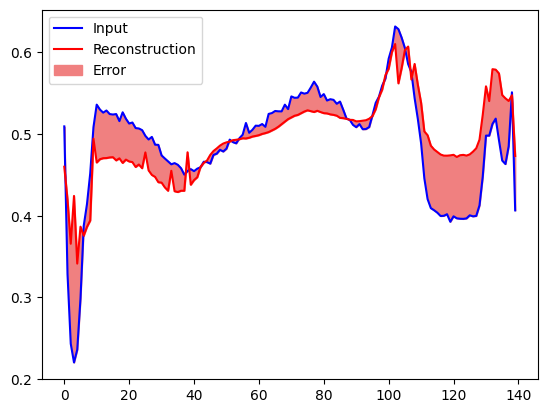

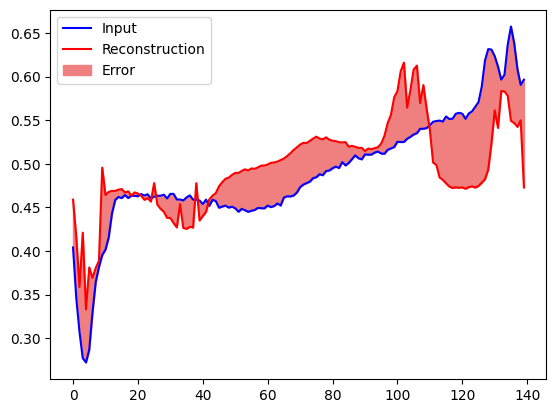

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
Threshold:  0.034273084
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy = 0.945
Precision = 0.9071428571428571
Recall = 0.9941291585127201


In [21]:
normal_decoded_data = autoencoder.predict(normal_test_data)
anomalous_decoded_data = autoencoder.predict(anomalous_test_data)

plt.plot(normal_test_data[0], 'b')
plt.plot(normal_decoded_data[0], 'r')
plt.fill_between(np.arange(140), normal_decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(anomalous_decoded_data[0], 'r')
plt.fill_between(np.arange(140), anomalous_decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
#Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


preds = predict(autoencoder, test_data, threshold)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#check the prediction accuracy of the ecg classifier

print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))

**Grading chart**

### Marking Grid

| Criteria                                     | Points |
|----------------------------------------------|---------------|
| Code Implementation                          |        1       |
| Noise Reduction Autoencoder experimentation  |        2       |
| Anomaly Detection Autoencoder experimentation|        2       |
| Questions & Analysis                         |        4       |
| Structure & Clarity                          |         1      |


